# Illustration of AR sectors for definition

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change path to working script directory
current_path=os.getcwd()
print(current_path)
major_path = current_path+"/../../../"
working_path=major_path+"/my_GIT/Synthetic_Airborne_Arctic_ARs/"
src_path=working_path+"/src/"
cfg_path=working_path+"/config/"
plt_path=working_path+"/plotting/"

print(working_path)
#os.chdir(working_path)
sys.path.insert(1, os.path.join(sys.path[0], working_path))
sys.path.insert(2,src_path)
sys.path.insert(3,cfg_path)
sys.path.insert(4,plt_path)

C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks
C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//my_GIT/Synthetic_Airborne_Arctic_ARs/


In [3]:
import flightcampaign as Campaign
import flightmapping# as RFmaps
import flight_track_creator
import data_config

In [4]:
airborne_data_importer_path=major_path+"/Work/GIT_Repository/"
print(airborne_data_importer_path)

# Config File
config_file=data_config.load_config_file(airborne_data_importer_path,"data_config_file")

analyse_all_flights=False

#
flight_dates={"North_Atlantic_Run":
              {"SRF02":"20180224",
               "SRF04":"20190319",#},
               "SRF07":"20200416",#},
               "SRF08":"20200419"
              },
              "Second_Synthetic_Study":
              {"SRF02":"20110317",
               "SRF03":"20110423",
               "SRF08":"20150314",
               "SRF09":"20160311",
               "SRF12":"20180225"
               }}
flight_tracks_dict={}
campaigns=[*flight_dates.keys()]
shifted_lat=0
shifted_lon=0
ar_of_day="SAR_internal"

campaign="Second_Synthetic_Study"
flight="SRF08"#"20150314"
config_file["Data_Paths"]

C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository/
C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/GIT_Repository//data_config_file.ini.ini  already exists


<Section: Data_Paths>

### Flight Track


In [5]:
import flight_track_creator
na_run=Campaign.Second_Synthetic_Study(
                             is_flight_campaign=True,
                             major_path=config_file["Data_Paths"]["campaign_path"],
                             aircraft="HALO",interested_flights=[flight],
                             instruments=["radar","radiometer","sonde"])               
#na_run.specify_flights_of_interest(flight[0])
#na_run.create_directory(directory_types=["data"])
cmpgn_cls=na_run

Flight_Tracker=flight_track_creator.Flighttracker(na_run,flight,
                                ar_of_day,track_type="internal",
                                shifted_lat=0,shifted_lon=0,
                                load_save_instantan=False)

halo_dict,campaign_path=Flight_Tracker.get_synthetic_flight_track(as_dict=True)        

Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/


In [6]:
if not isinstance(halo_dict,pd.DataFrame):
    halo_df,leg_df=Flight_Tracker.concat_track_dict_to_df()
else:
    halo_df=halo_dict.copy()

### IVT Field 

In [7]:
import atmospheric_rivers as AR
import gridonhalo as Grid_on_HALO
from reanalysis import ERA5,CARRA
carra_lvls_path=cmpgn_cls.campaign_path+"/data/CARRA/"
print(carra_lvls_path)    
carra=CARRA(for_flight_campaign=True,
            campaign=campaign,research_flights=None,
            carra_path=carra_lvls_path) 
        
CARRA_on_HALO=Grid_on_HALO.CARRA_on_HALO(halo_df,carra_lvls_path,
                True,campaign,config_file["Data_Paths"]["campaign_path"],
                [flight],flight_dates[campaign][flight],config_file,ar_of_day=ar_of_day,
                synthetic_flight=True,
                do_instantaneous=False)

#IVT field
CARRA_on_HALO.merge_all_files_for_given_flight()
CARRA_on_HALO.calc_ivt_from_origin_carra_ds()
# mean HALO time stamp is 17:44 so 18:00 is a good timestamp which represents iloc=2
carra_ivt=CARRA_on_HALO.carra_ivt.isel(time=2)
carra_ivt=CARRA_on_HALO.carra_ivt.isel(time=2)
carra_ivt

C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study//data/CARRA/
Calculate q from RH
mixing_ratio calculated
specific humidity calculated
Calculate IVT from CARRA


<xarray.Dataset>
Dimensions:    (y: 1269, x: 1069)
Coordinates:
    step       int64 4
    time       datetime64[ns] 2015-03-14T18:00:00
    latitude   (y, x) float64 55.81 55.82 55.82 55.83 ... 77.87 77.85 77.83
    longitude  (y, x) float64 -57.1 -57.06 -57.02 -56.99 ... 37.56 37.6 37.63
Dimensions without coordinates: y, x
Data variables:
    IVT        (y, x) float64 41.23 39.86 38.87 38.74 ... 87.26 87.33 86.36
    IVT_u      (y, x) float64 10.2 9.877 9.795 9.868 ... 75.84 75.84 75.99 75.2
    IVT_v      (y, x) float64 -39.95 -38.61 -37.62 -37.46 ... 43.16 43.03 42.45
    IWV_clc    (y, x) float64 3.492 3.341 3.297 3.294 ... 4.427 4.419 4.409 4.39

### IVT along HALO track


In [8]:
CARRA_on_HALO.load_or_calc_interpolated_hmp_data()
halo_carra_hmp=CARRA_on_HALO.halo_carra_hmp 
halo_carra_hmp.index=pd.DatetimeIndex(halo_carra_hmp.index)
halo_carra_hmp.name="CARRA"
halo_carra_hmp=cmpgn_cls.calc_distance_to_IVT_max(
                        halo_df,
                        halo_carra_hmp)
halo_carra_hmp["highres_Interp_IWV"]=halo_carra_hmp["Interp_IWV_clc"].values
halo_carra_hmp["highres_Interp_IVT"]=halo_carra_hmp["Interp_IVT"].values

halo_carra_hmp_dict={}
halo_carra_hmp_dict[flight]={}
halo_carra_hmp_dict[flight]["AR_internal"]=halo_carra_hmp
new_halo_dict={}
new_halo_dict[flight]=halo_dict
        

CARRA data is already interpolated


In [9]:
from atmospheric_rivers import Atmospheric_Rivers
AR_inflow,AR_outflow=Atmospheric_Rivers.locate_AR_cross_section_sectors(
                                    new_halo_dict,halo_carra_hmp_dict,flight)
# Two sondes per sector
number_of_sondes=2
sondes_selection={}
for sector in ["warm_sector","core","cold_sector"]:
    add_sonde=1
    if sector=="core":
        add_sonde=1
    sondes_selection["ind_inflow_"+sector]=np.linspace(0,AR_inflow["AR_inflow_"+sector].shape[0]-1,
                                                        num=number_of_sondes+add_sonde).astype(int)
    sondes_selection["ind_outflow_"+sector]=np.linspace(0,AR_outflow["AR_outflow_"+sector].shape[0]-1,
                                                         num=number_of_sondes+add_sonde).astype(int)
    sondes_selection["time_inflow_"+sector]=AR_inflow["AR_inflow_"+sector].index[\
                                    sondes_selection["ind_inflow_"+sector]]
    sondes_selection["time_outflow_"+sector]=AR_outflow["AR_outflow_"+sector].index[\
                                    sondes_selection["ind_outflow_"+sector]]
    sondes_selection["pos_inflow_"+sector]=AR_inflow["AR_inflow_"+sector][\
                                            ["Halo_Lat","Halo_Lon"]].loc[sondes_selection["time_inflow_"+sector]]
    sondes_selection["pos_outflow_"+sector]=AR_outflow["AR_outflow_"+sector][\
                                ["Halo_Lat","Halo_Lon"]].loc[sondes_selection["time_outflow_"+sector]]

    sondes_selection["pos_all_"+sector]=pd.concat([sondes_selection["pos_inflow_"+sector],
                                                   sondes_selection["pos_outflow_"+sector]])

#%% Loc and locate sondes for regression method
            
sondes_selection

{'ind_inflow_warm_sector': array([  0, 257, 515]),
 'ind_outflow_warm_sector': array([   0,  502, 1004]),
 'time_inflow_warm_sector': DatetimeIndex(['2015-03-14 16:32:59', '2015-03-14 16:37:16',
                '2015-03-14 16:41:34'],
               dtype='datetime64[ns]', freq=None),
 'time_outflow_warm_sector': DatetimeIndex(['2015-03-14 18:25:18', '2015-03-14 18:33:39',
                '2015-03-14 18:42:01'],
               dtype='datetime64[ns]', freq=None),
 'pos_inflow_warm_sector':                       Halo_Lat  Halo_Lon
 2015-03-14 16:32:59  72.000955 -0.475346
 2015-03-14 16:37:16  72.067892 -2.328311
 2015-03-14 16:41:34  72.117303 -4.200188,
 'pos_outflow_warm_sector':                       Halo_Lat  Halo_Lon
 2015-03-14 18:25:18  74.601509  8.202325
 2015-03-14 18:25:18  74.600000  8.200000
 2015-03-14 18:33:39  74.794619  4.013540
 2015-03-14 18:42:01  74.910209 -0.265576,
 'pos_all_warm_sector':                       Halo_Lat  Halo_Lon
 2015-03-14 16:32:59  72.000955 -0.

Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks/../../..//Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/Fig05_AR_sector_illustration_20150314.png


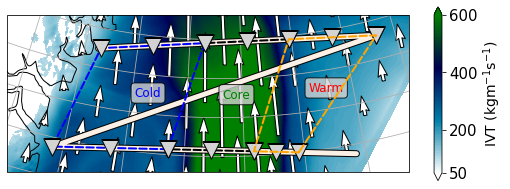

In [14]:
import matplotlib
import matplotlib.pyplot as plt

import cmasher as cmr
import cartopy.crs as ccrs

from matplotlib import gridspec
from typhon.plots import styles
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

set_font=14
matplotlib.rcParams.update({'font.size':set_font})
# Define the plot specifications for the given variables
met_var_dict={}
met_var_dict["ERA_name"]    = {"IWV":"tcwv","IVT":"IVT"}
met_var_dict["colormap"]    = {"IWV":"density","IVT":"ocean_r"}
met_var_dict["levels"]      = {"IWV":np.linspace(10,50,51),
                               "IVT":np.linspace(50,600,61)}
met_var_dict["units"]       = {"IWV":"(kg/$\mathrm{m}^2$)",
                               "IVT":"(kg$\mathrm{m}^{-1}\mathrm{s}^{-1}$)"}
        
#self.carra_ivt["longitude"]=self.carra_ivt["longitude"].where(
#    self.carra_ivt["longitude"]<180,self.carra_ivt["longitude"]-360)

lat2=np.array(carra_ivt["latitude"][:])
lon2=np.array(carra_ivt["longitude"][:])
lower_lon=-24
lower_lat=71
upper_lon=8
upper_lat=75
# Sector specification
#TIVT_inflow,TIVT_outflow=Atmospheric_Rivers.calc_TIVT_of_sectors(
#                                    AR_inflow,AR_outflow,grid_name)
            
   
with plt.style.context(styles("typhon")):
                
    map_fig=plt.figure(figsize=(9,16))
    #gs=gridspec.GridSpec(1,1,width_ratios=[1,1])
    ax=plt.subplot(projection=ccrs.AzimuthalEquidistant(
                                        central_longitude=-7.0,central_latitude=72))
    ax.coastlines(resolution="50m")
    ax.gridlines()
    carra_ivt["IVT"]=carra_ivt["IVT"].where(carra_ivt["IVT"]>100)
    C1=plt.contourf(lon2,lat2,carra_ivt["IVT"].values,
                            transform=ccrs.PlateCarree(),cmap=plt.get_cmap("ocean_r"),
                    extend="both",levels=np.linspace(50,600,101))
    import matplotlib.patheffects as pe
    
    plt.plot(halo_df["longitude"],halo_df["latitude"],color="linen",
             lw=5,path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()],
             transform=ccrs.PlateCarree())
    plt.scatter(sondes_selection["pos_all_cold_sector"]["Halo_Lon"],
                sondes_selection["pos_all_cold_sector"]["Halo_Lat"],
                marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
    plt.scatter(sondes_selection["pos_all_warm_sector"]["Halo_Lon"],
                sondes_selection["pos_all_warm_sector"]["Halo_Lat"],
                marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
    plt.scatter(sondes_selection["pos_all_core"]["Halo_Lon"],
                sondes_selection["pos_all_core"]["Halo_Lat"],
                marker="v",s=300,color="lightgrey",edgecolor="k",transform=ccrs.PlateCarree(),zorder=4)
    # Warm sector rectangle
    plt.plot([sondes_selection["pos_all_warm_sector"]["Halo_Lon"][0],
              sondes_selection["pos_all_warm_sector"]["Halo_Lon"][2],
              sondes_selection["pos_all_warm_sector"]["Halo_Lon"][6],
              sondes_selection["pos_all_warm_sector"]["Halo_Lon"][3],
              sondes_selection["pos_all_warm_sector"]["Halo_Lon"][0]],
             [sondes_selection["pos_all_warm_sector"]["Halo_Lat"][0],
              sondes_selection["pos_all_warm_sector"]["Halo_Lat"][2],
              sondes_selection["pos_all_warm_sector"]["Halo_Lat"][6],
              sondes_selection["pos_all_warm_sector"]["Halo_Lat"][3],
              sondes_selection["pos_all_warm_sector"]["Halo_Lat"][0]],
             color="orange",lw=2,ls="--",zorder=5,
             transform=ccrs.PlateCarree())
    # Warm sector rectangle
    plt.plot([sondes_selection["pos_all_cold_sector"]["Halo_Lon"][0],
              sondes_selection["pos_all_cold_sector"]["Halo_Lon"][2],
              sondes_selection["pos_all_cold_sector"]["Halo_Lon"][5],
              sondes_selection["pos_all_cold_sector"]["Halo_Lon"][3],
              sondes_selection["pos_all_cold_sector"]["Halo_Lon"][0]],
             [sondes_selection["pos_all_cold_sector"]["Halo_Lat"][0],
              sondes_selection["pos_all_cold_sector"]["Halo_Lat"][2],
              sondes_selection["pos_all_cold_sector"]["Halo_Lat"][5],
              sondes_selection["pos_all_cold_sector"]["Halo_Lat"][3],
              sondes_selection["pos_all_cold_sector"]["Halo_Lat"][0]],
             color="blue",lw=2,ls="--",zorder=3,
             transform=ccrs.PlateCarree())
    plt.plot([sondes_selection["pos_all_core"]["Halo_Lon"][0],
              sondes_selection["pos_all_core"]["Halo_Lon"][2]],
              [sondes_selection["pos_all_core"]["Halo_Lat"][0],
              sondes_selection["pos_all_core"]["Halo_Lat"][2]],
              color="k",lw=2,ls="--",zorder=3,transform=ccrs.PlateCarree())
    plt.plot([sondes_selection["pos_all_core"]["Halo_Lon"][3],
              sondes_selection["pos_all_core"]["Halo_Lon"][5]],
              [sondes_selection["pos_all_core"]["Halo_Lat"][3],
              sondes_selection["pos_all_core"]["Halo_Lat"][5]],
              color="k",lw=2,ls="--",zorder=3,transform=ccrs.PlateCarree())
    plt.text(1.0,73.52,"Warm",fontsize=12,color="red",
             bbox=dict(facecolor='lightgrey',edgecolor="k",
                  boxstyle="round",alpha=0.8),
             transform=ccrs.PlateCarree())
    plt.text(-6.8,73.5,"Core",fontsize=12,color="green",
             bbox=dict(facecolor='lightgrey',edgecolor="k",
                  boxstyle="round",alpha=0.8),
             transform=ccrs.PlateCarree())
    plt.text(-14.7,73.4,"Cold",fontsize=12,color="blue",
             bbox=dict(facecolor='lightgrey',edgecolor="k",
                  boxstyle="round",alpha=0.8),
             transform=ccrs.PlateCarree())

    cb=plt.colorbar(C1,ax=ax,shrink=0.2)
    cb.set_label("IVT ($\mathrm{kgm}^{-1}\mathrm{s}^{-1}$)",fontsize=14)
    cb.set_ticks([50,200,400,600])
    ax.set_extent([lower_lon,upper_lon,lower_lat,upper_lat])
    ## Add quiver
    step=45
    quiver_lon=np.array(carra_ivt["longitude"][::step,::step])
    quiver_lat=np.array(carra_ivt["latitude"][::step,::step])
    u=np.array(carra_ivt["IVT_u"][::step,::step])
    v=np.array(carra_ivt["IVT_v"][::step,::step])
    #u[u<50]=np.nan
    v[v<50]=np.nan
    quiver=ax.quiver(quiver_lon,quiver_lat,u,v,color="white",
                    edgecolor="k",linewidth=1,scale=600,
                    scale_units="inches",pivot="mid",
                    width=0.008,transform=ccrs.PlateCarree())
    #os.chdir(os.getcwd()+"/../Synthetic_AR_Paper/Manuscript/Paper_Plots/")
    #print(os.getcwd())
    #sys.exit()
    plot_path=major_path+"/Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/"
    #print("Figure is saved as: ", plot_path)
    fig_name="Fig05_AR_sector_illustration_20150314.png"
    map_fig.savefig(plot_path+fig_name,dpi=500,bbox_inches="tight")
    print("Figure saved as:",plot_path+fig_name)